# A case study of olympic data 

### EDA on 120 Years of olympic  data :

- A case study of olympic data from Athens 1896 to Rio 2016 (120 years).
- This dataset is taken from kraggle, which contain basic data on athletes and madels respactively.It can be found [here](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).
- We'll analyse this data to discover various insights using common data analysis tools such as numpy,pandas,matplotlib,seaborn etc.

- This case study is done in collaboration with [JovianML](https://jovian.ml/) , A Plateform for data-science prjects.<br>Special thanks to [FreeCodeCamp](www.freecodecamp.org) and [Stack-overflow](www.stackoverflow) for great learning base.

#### As a first step, let's upload our Jupyter notebook to [JovianML](https://jovian.ml) .
- This will be our starter notebook for any unexpected rollback :

In [2]:
!pip install jovian --upgrade -q

/usr/bin/sh: 1: pip: not found


In [3]:
import jovian

In [50]:
#jovian.commit(project= project_name) #uncomment_this

### Importing data analysis libraries:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Links to libraries :
[Numpy](https://numpy.org/)   [Pandas](https://pandas.pydata.org/)   [Matplotlib](https://matplotlib.org/)       [Seaborn](https://seaborn.pydata.org/)

### Importing Data :
#### As we have Imported basic libraries , let us add our datasets containg two CSV file using pandas .

In [56]:
events = pd.read_csv('athlete_events.csv',)
regions = pd.read_csv('regions.csv')

### Let's merge our two dataset for our future analysis .

In [7]:
merged_data_raw = pd.merge(events, regions, on = 'NOC', how ='left')

Let's peek at our dataset for more informations using pandas info() funtion.

In [8]:
merged_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


We'll call pandas head funtion to get a minamal details of our data, by default head function returns only 5 entry from our dataframe.<br>Let's continue ...

In [9]:
merged_data_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Now we can  use pandas desccribe funtion to get more
details of our data .

In [10]:
merged_data_raw.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


As we have loaded our dataset, we are ready to move on to next step of preprocessing and data cleaning for our data analysis

## Data cleaning and preprocessing :

#### While the survey responses contains a wealth of informations , we'll limit our analysis to the following areas:
- Demographic of Athletes with highest number of medal (Gold,Silver,Bronze).
- Distribution of Age , sex and ratio of heights and weights.
- Gender biasing in olymlpic.
- Performance of women  over time.
- Comparison based on gender .
- Evaluation of olmpic over time and much more ...

At first let's create a subset of column with relevent data required for our furthur analysis of data without affecting the original dataframe.

In [11]:
selected_columns =[
    'ID',
    'Name',
    'Age',
    'Height',
    'Weight',
    'Year',
    'Sport',
    'Medal',
    'Season',
    'NOC',
    'Sex'
]

In [12]:
len(selected_columns)

11

Let's extract a copy of our selected column into our new dataframe df for now . 

In [13]:
df = merged_data_raw[selected_columns].copy()

Let's peek at our new df dataframe for basic informations.

In [14]:
df = df.set_index(['ID'])
df

,Name,Age,Height,Weight,Year,Sport,Medal,Season,NOC,Sex
ID,,,,,,,,,,
1,A Dijiang,24.0,180.0,80.0,1992,Basketball,NaN,Summer,CHN,M
2,A Lamusi,23.0,170.0,60.0,2012,Judo,NaN,Summer,CHN,M
3,Gunnar Nielsen Aaby,24.0,NaN,NaN,1920,Football,NaN,Summer,DEN,M
4,Edgar Lindenau Aabye,34.0,NaN,NaN,1900,Tug-Of-War,Gold,Summer,DEN,M
5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,Speed Skating,NaN,Winter,NED,F
...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,29.0,179.0,89.0,1976,Luge,NaN,Winter,POL,M
135570,Piotr ya,27.0,176.0,59.0,2014,Ski Jumping,NaN,Winter,POL,M
135570,Piotr ya,27.0,176.0,59.0,2014,Ski Jumping,NaN,Winter,POL,M


Our new dataframe df contains 271116 rows and 10 columns of our intrests , which we gonna use it for sake of detailed analysis. 

Finally lets call the info() attrinute to get more information about processed data frame df.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Age     261642 non-null  float64
 2   Height  210945 non-null  float64
 3   Weight  208241 non-null  float64
 4   Year    271116 non-null  int64  
 5   Sport   271116 non-null  object 
 6   Medal   39783 non-null   object 
 7   Season  271116 non-null  object 
 8   NOC     271116 non-null  object 
 9   Sex     271116 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 22.8+ MB


Before moving ahead, let's calculate our NaN values count and try to reduce it to most clean state .

In [16]:
df.isnull().sum()

Name           0
Age         9474
Height     60171
Weight     62875
Year           0
Sport          0
Medal     231333
Season         0
NOC            0
Sex            0
dtype: int64

#### As we can see , there are few entries with NaN values , We'll try to deal with missing values and manually adjust the required data type for each column or on  a case-by-case-basis.

let us first rename our 'NOC' to 'Country' for easy understanding to viewers.

In [17]:
df.rename(columns={'NOC': 'Country'}, inplace= True)

In [18]:
df.head()

,Name,Age,Height,Weight,Year,Sport,Medal,Season,Country,Sex
ID,,,,,,,,,,
1,A Dijiang,24.0,180.0,80.0,1992,Basketball,NaN,Summer,CHN,M
2,A Lamusi,23.0,170.0,60.0,2012,Judo,NaN,Summer,CHN,M
3,Gunnar Nielsen Aaby,24.0,NaN,NaN,1920,Football,NaN,Summer,DEN,M
4,Edgar Lindenau Aabye,34.0,NaN,NaN,1900,Tug-Of-War,Gold,Summer,DEN,M
5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,Speed Skating,NaN,Winter,NED,F


As we are going to do analysis on medal column later , let's clean our medal values .

In [19]:
df['Medal'].fillna('No medal', inplace =True )

In [20]:
df.head(10)

,Name,Age,Height,Weight,Year,Sport,Medal,Season,Country,Sex
ID,,,,,,,,,,
1,A Dijiang,24.0,180.0,80.0,1992,Basketball,No medal,Summer,CHN,M
2,A Lamusi,23.0,170.0,60.0,2012,Judo,No medal,Summer,CHN,M
3,Gunnar Nielsen Aaby,24.0,NaN,NaN,1920,Football,No medal,Summer,DEN,M
4,Edgar Lindenau Aabye,34.0,NaN,NaN,1900,Tug-Of-War,Gold,Summer,DEN,M
5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,Speed Skating,No medal,Winter,NED,F
5,Christine Jacoba Aaftink,21.0,185.0,82.0,1988,Speed Skating,No medal,Winter,NED,F
5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,Speed Skating,No medal,Winter,NED,F
5,Christine Jacoba Aaftink,25.0,185.0,82.0,1992,Speed Skating,No medal,Winter,NED,F
5,Christine Jacoba Aaftink,27.0,185.0,82.0,1994,Speed Skating,No medal,Winter,NED,F


We have successfully cleaned our medals values therefore let's move forward with height ,weight and Age columns column for furthur  processing .
- we can see NaN values using the same isnull() funtion provided by pandas library.
- Let's move ahead and print the total numbers of null-values corrosponding to Age,Height and weight accordingly.

In [21]:
print('* Height-null-count :',df['Height'].isnull().sum())
print('* Weight-null-count :',df['Weight'].isnull().sum())
print('* Age-null-count  :',df['Age'].isnull().sum())

* Height-null-count : 60171
* Weight-null-count : 62875
* Age-null-count  : 9474


###### Since we have lots of null values from Age, Height and Weight,We neeed to clean them as well.So let us get right into it.We'll try to adjust missing NaN value by taking [mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) value from corresponding cells.

In [22]:
df['Height'].fillna(df.Height.mean(), inplace=True)

In [23]:
df['Weight'].fillna(df.Weight.mean(), inplace=True)

In [24]:
df['Age'].fillna(df.Age.mean(), inplace=True)

In [25]:
df.Age.describe()

count    271116.000000
mean         25.556898
std           6.280857
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

Here we have Age columns detailed view with minimum age 10 and maximum age 97 with average age bearing 25 years.

Till now, we are pretty much  done with our data cleaning and preprocessing of our dataset .To make sure let us call our dataframe once again for any missing or null values.

In [26]:
df.isnull().sum()

Name       0
Age        0
Height     0
Weight     0
Year       0
Sport      0
Medal      0
Season     0
Country    0
Sex        0
dtype: int64

#### whoopee , We have cleaned our dataset , Let's move onto next step  expanotory analysis and vizualization .

## Explanatory analysis and vizualization

- Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.
- We will use seaborn and most popular matplotlib library for this case study.we gonna use  various plots found [here](https://matplotlib.org/3.1.0/gallery/index.html).
       
##### Let's proceed to our next step of analysis ...
   

## Top achivers:
Let's look at the top  countries to get different medals obtained , We'll limit our findings to 10 countries and plot them using matplotlib [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) .

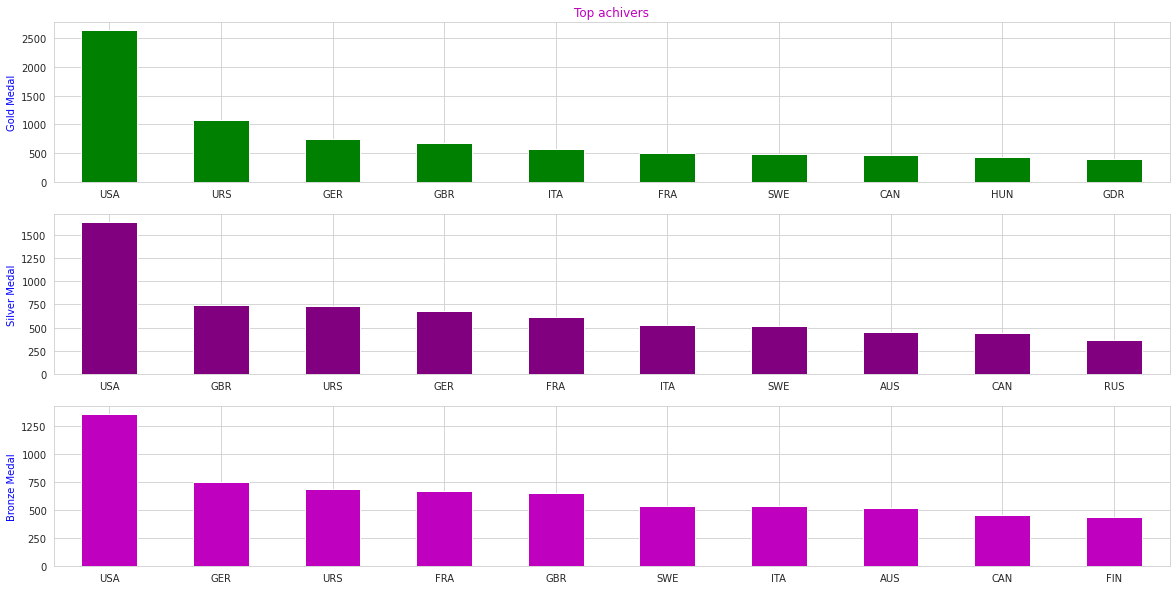

In [49]:
plt.subplot(3,1,1)
plt.title('Top achivers',color='m')
gold = df[df.Medal == "Gold"].Country.value_counts().head(10)
gold.plot(kind='bar',rot=0,figsize=(20, 10),color='g')
plt.ylabel("Gold Medal",color='b')

plt.subplot(3,1,2)
silver = df[df.Medal == "Silver"].Country.value_counts().head(10)
silver.plot(kind='bar',rot=0,figsize=(20, 10),color='purple')
plt.ylabel("Silver Medal",color='b')

plt.subplot(3,1,3)
bronze = df[df.Medal == "Bronze"].Country.value_counts().head(10)
bronze.plot(kind='bar',rot=0,figsize=(20, 10),color='m')
plt.ylabel("Bronze Medal",color='b')
plt.show()

It appears that a disproportionately high numbers of athletes from USA has attain highest number of medals in all catagories.

## Age:
The distribution of the age of athletes is another important factor to look at, and we can use a [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) to visualize it.

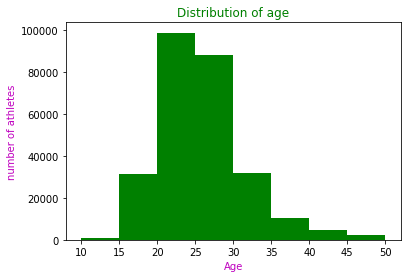

In [28]:
plt.title('Distribution of age', color='g')
plt.ylabel('number of athletes',color='m')
plt.xlabel('Age',color='m')
plt.hist(df.Age, bins= np.arange(10,55,5),color='g');

It appears that large numbers of athletes are in the age ranges of 20-30.Which is somewhat adaquate age for being a athlete to make better result in sports.

## Gender:
Let's look at the distribution of Gender among atheletes. It's a well known fact that women are underrepresented in the sport, so we might expect to see a skewed distribution here.

In [29]:
gender_counts = df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

A [Pie](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html?highlight=pie#matplotlib.pyplot.pie) chart would be good way to vizualize the distribution.

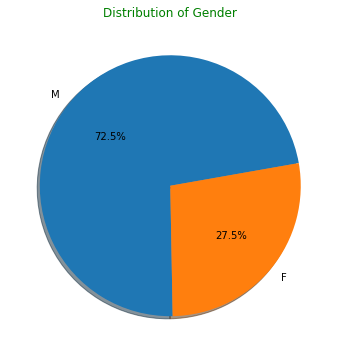

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Gender',color='g')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=10,shadow=True);

#### Only about 27% of athletes are women perticipated in olympic.Which is below avarage in comparison to male perticipant.Therefore it would be great to see more women athletes in coming years.

#### Let's look at the number of women incresed as compare to summer olympic .

In [31]:
womenOverTime = df[(df.Sex == 'F') & (df.Season == 'Summer')]

In [32]:
womenOverTime.head()

,Name,Age,Height,Weight,Year,Sport,Medal,Season,Country,Sex
ID,,,,,,,,,,
8,"Cornelia ""Cor"" Aalten (-Strannood)",18.0,168.0,70.702393,1932,Athletics,No medal,Summer,NED,F
8,"Cornelia ""Cor"" Aalten (-Strannood)",18.0,168.0,70.702393,1932,Athletics,No medal,Summer,NED,F
13,Minna Maarit Aalto,30.0,159.0,55.500000,1996,Sailing,No medal,Summer,FIN,F
13,Minna Maarit Aalto,34.0,159.0,55.500000,2000,Sailing,No medal,Summer,FIN,F
21,Ragnhild Margrethe Aamodt,27.0,163.0,70.702393,2008,Handball,Gold,Summer,NOR,F


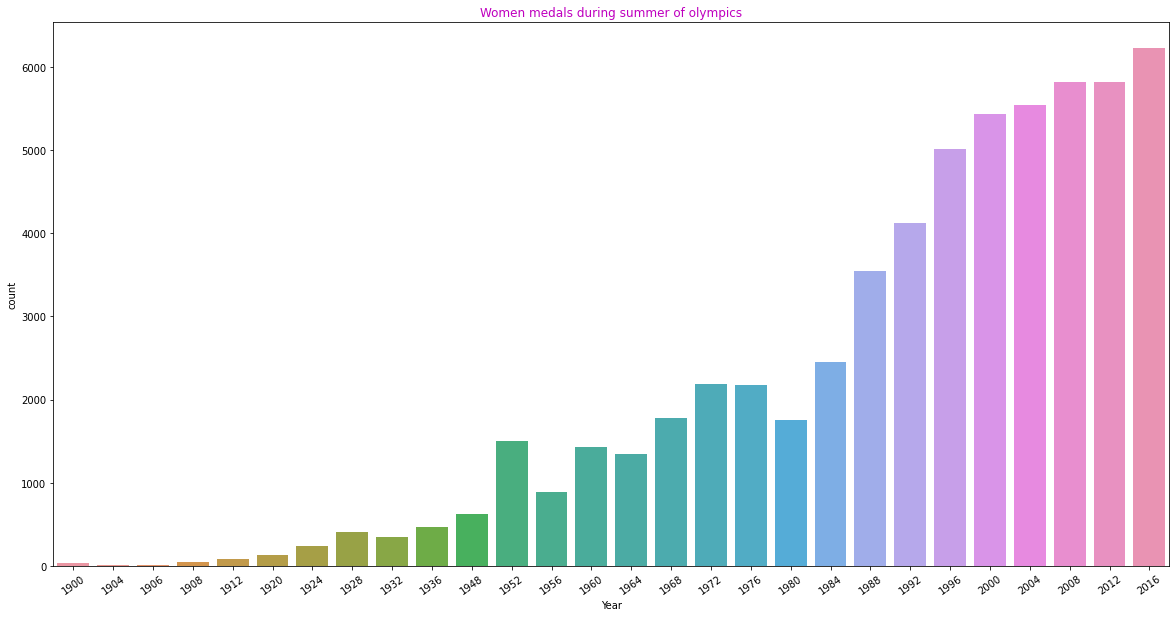

In [33]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=35)
plt.title('Women medals during summer of olympics',color='m')
sns.countplot(x='Year', data=womenOverTime);

We can see a stiff increase of women in olympic over the years , To be noted that we have only taken account of summer season . 

## Height vs Weight :
We will trace difference of height and weight among the athletes in different years using seaborn [Boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html).We will compare it with respact to genders of athletes for a detail view.

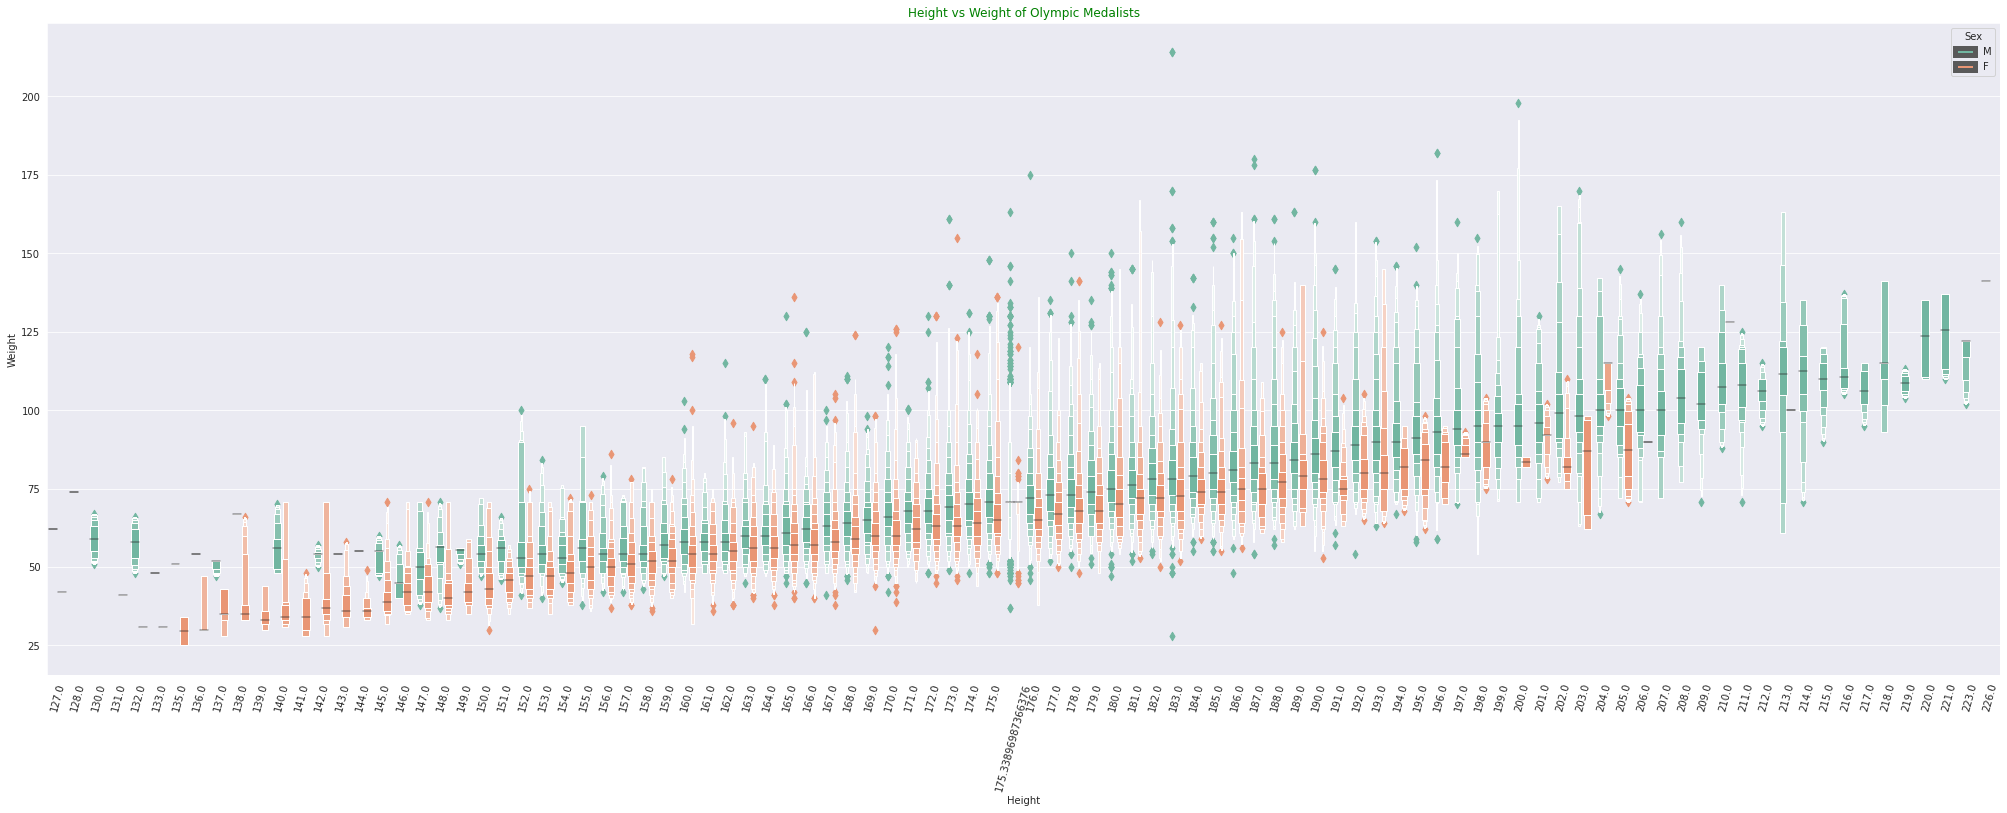

In [57]:
plt.figure(figsize=(35,12))
plt.xticks(rotation=75)
sns.set_style('darkgrid')
plt.title('Height vs Weight of Olympic Medalists',color='g')
sns.boxenplot(x='Height', y='Weight', hue='Sex', scale='linear', data=df, palette="Set2", linewidth=10)
plt.show()

### Kernal-density-estimation  of age vs height of atheletes . 
- Generate Kernel Density Estimate plot using Gaussian kernels.

- In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.
- we will use pandas kde plot to find co-relation of player age with respact height from our data.

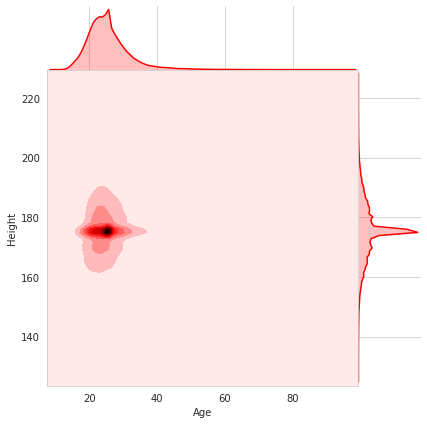

In [35]:
sns.set_style('whitegrid')
sns.jointplot(df.Age, df.Height, kind="kde", height= 6, space= 0 , color='r')
plt.show();

KDE shows are that common age and heght of athletes are ~25 years and ~160 centimeter respectively.Therefore I think 25 is the adaquate age for professional sportmanship.

## Asking and Answering Questions

We've already gained several insights about the 120 years of olympic game in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

### Q : What are the top ten countries with highest medal counts ?

In [36]:
medals_top = df.Country.value_counts().reset_index(name="Medal").head(10)

In [37]:
medals_top

,index,Medal
0,USA,18853
1,FRA,12758
2,GBR,12256
3,ITA,10715
4,GER,9830
5,CAN,9733
6,JPN,8444
7,SWE,8339
8,AUS,7638
9,HUN,6607


From my observation,USA holds the highest number of gold followed by France and Great Britian and so on.Almost over 18000 medals are acquired by USA .

### Q: Who is the youngest and oldest player from olympic history?

To find our player with minimum and maximum age,Let us define variables and do some pandas operations.

##### Oldest Player :

In [38]:
oldest_athletes = df.sort_values(by='Age', ascending=False)
oldest_athletes.set_index('Name').head(1)

,Age,Height,Weight,Year,Sport,Medal,Season,Country,Sex
Name,,,,,,,,,
John Quincy Adams Ward,97.0,175.33897,70.702393,1928,Art Competitions,No medal,Summer,USA,M


- John Quincy Adams Ward (June 29, 1830 – May 1, 1910) was an American sculptor, who may be most familiar for his larger than lifesize standing statue of George Washington on the steps of Federal Hall National Memorial in New York City.<br>Nineteenth-century American commissions for sculpture were largely confined to portrait busts and monuments, where Ward was preeminent in his generation. Sculptors also made a living selling bronze reductions of their public works; Ward made use of new galvanoplastic duplicating techniques; many of Ward's reductions and galvanoplastic and die-stamped relief panels survive. 

##### Youngest of all :

In [39]:
youngest_athletes = df.sort_values(by='Age', ascending=True)
youngest_athletes.set_index('Name').head(1)

,Age,Height,Weight,Year,Sport,Medal,Season,Country,Sex
Name,,,,,,,,,
Dimitrios Loundras,10.0,175.33897,70.702393,1896,Gymnastics,Bronze,Summer,GRE,M


- Dimitrios Loundras (6 September 1885 – 15 February 1970) was a Greek gymnast and naval officer who competed at the 1896 Summer Olympics in Athens. He was the last surviving participant of these Games. 
At 10 years 218 days he remains the youngest medalist and competitor in Olympic history .

### Q: How participation of gender changes over time ?

As we show drastic changes in women participation over time increased, Let's compare them with man participation using scatterplot.

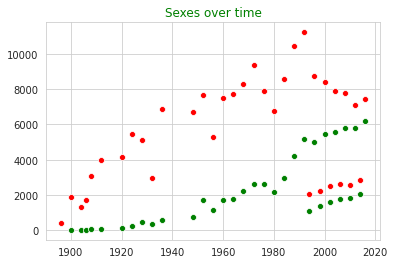

In [40]:
female_year = df[df.Sex=='F'].groupby('Year').agg('count').Name
male_year = df[df.Sex=='M'].groupby('Year').agg('count').Name
plt.title('Sexes over time', color='g')
(sns.scatterplot(data= male_year,color='r'),
sns.scatterplot(data =female_year,color='g'));

- Here's what I saw :<br>
    1.We have step increase in women participation.
    <br>
    2.The grow is constant for female gender.

### Q: What are the overall number Male winners per summer olympic edition ?

As we have more data from the summer season,we'll concentarate our finding to summer season only.We cam do same for the female catagory as well.

In [61]:
male_only = df[df.Sex == "M"]
nums_male = df[(df.Sex == 'M') & (df.Season == 'Summer')]

As we have extracted our data,Let's plot a countplot for it .

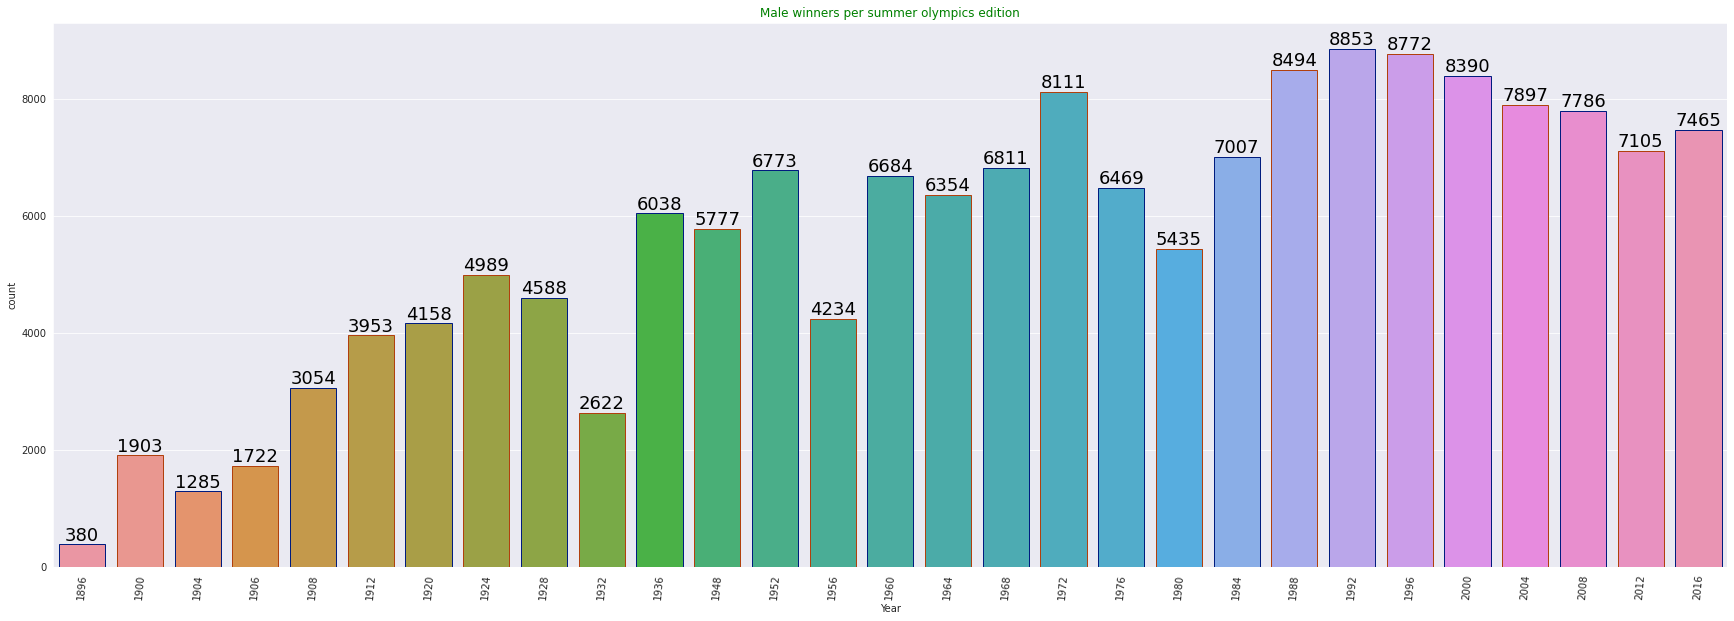

In [62]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=85)
ax = sns.countplot(x='Year', data= nums_male, edgecolor=sns.color_palette("dark", 2))
plt.title('Male winners per summer olympics edition',color='g');

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=18, color='black', ha='center', va='bottom')

### Q: What are the overall number Female winners per summer olympic edition ?

We gonna find the same for female catagory as well 

In [58]:
female_only = df[df.Sex == "F"]
nums_female = df[(df.Sex == 'F') & (df.Season == 'Summer')]

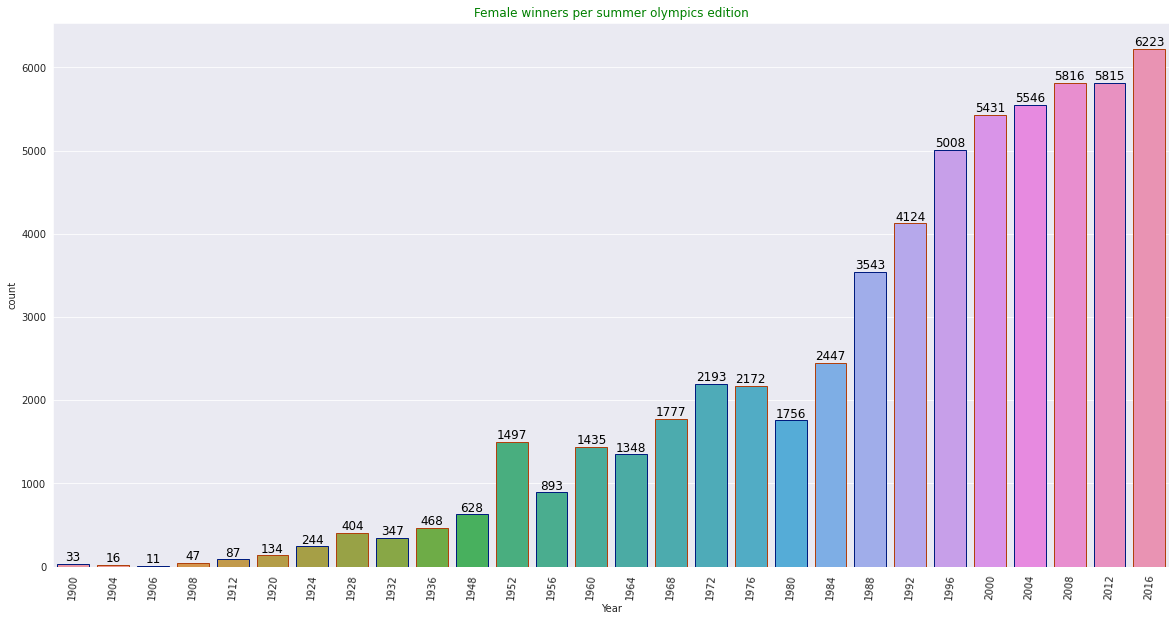

In [59]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=85)
ax1 = sns.countplot(x='Year', data= nums_female, edgecolor=sns.color_palette("dark", 2))
plt.title('Female winners per summer olympics edition',color='g');

for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

From our observation , Female performance in summer olympic season are growing steadily as compared to mens .

### Q: what are the corelation among  Events and Year from olympic games ?

- Let us plot a heatmap to find the corelation of sport,events and years .

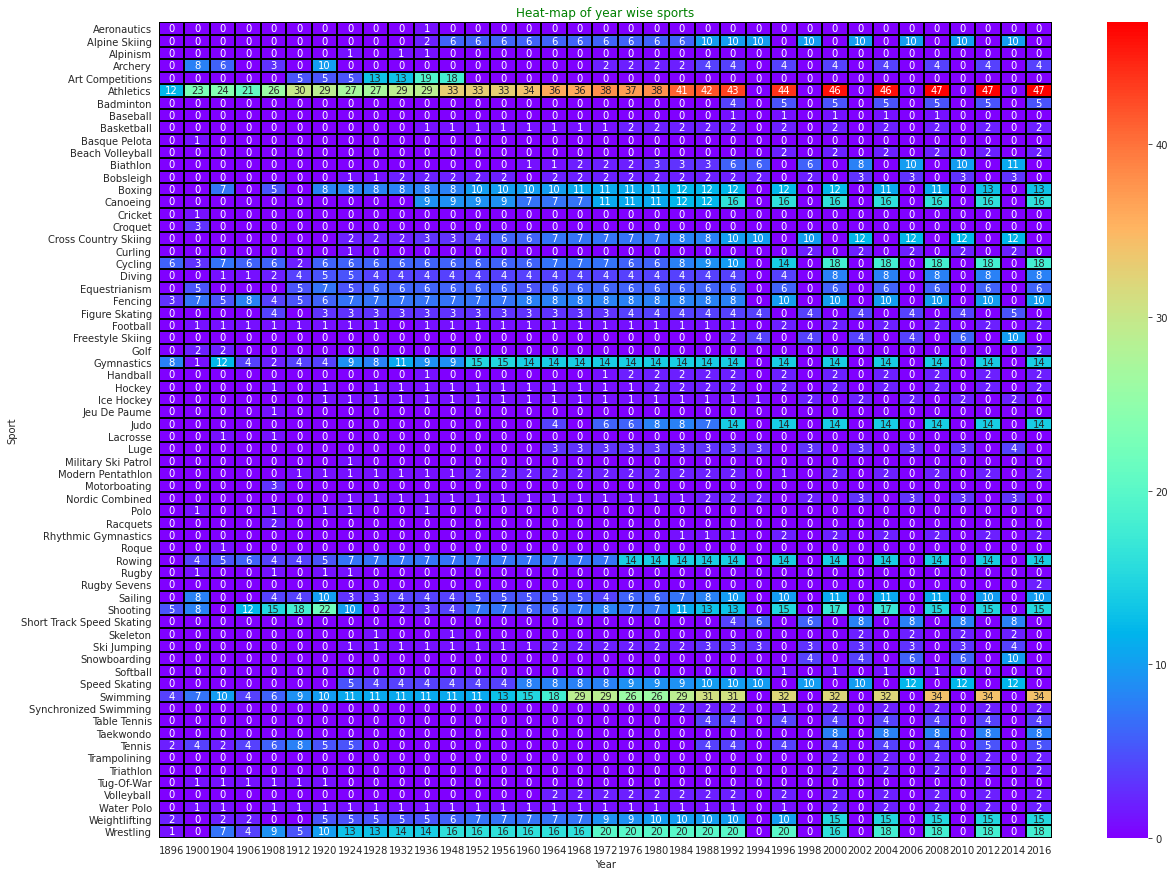

In [45]:
sport_count = pd.pivot_table(index="Sport",columns="Year",data=events,
                        values="Event",aggfunc="nunique")
sport_count = sport_count.fillna(0)
x = plt.figure(figsize=(20,15))
sns.heatmap(sport_count,linewidth=1,annot=True,cmap="rainbow",linecolor="k")

plt.title("Heat-map of year wise sports",color="g")
plt.show()

We can clearly see that athletics, shooting, swimming are the most held events from entire olympic game.

### Q: How India perform at olympic ?

- To demostrate our finding for India,we wiil extract data only for  Indian nationals.

In [46]:
Indian_medals=df[df.Country=='IND']

In [47]:
medal_count_IND = pd.DataFrame(Indian_medals.Medal.value_counts())

In [48]:
medal_count_IND

,Medal
No medal,1211
Gold,138
Bronze,40
Silver,19


So, India have won 138 Gold medals, 19 Silver medals and 40 Bronze medals overall. However, Hockey is a game played in Teams.Goverment should focus more on sports in coming years for better performances.

## Inferences and Conclusions :

We have gather so much insight from our EDA on 120 years of olympic data,here is a summery of the few of them .
- Competition has been increasing ever since inception of Olympics.
- USA had many medals from all olympic games,almost over 18000 of them including gold,silver and bronze trophies.
- Rate of participation of female was low at the early olympic (27%) but we have saw it is increasing in recent years.
- Maximum athlete are from age range 20 - 30 years only.More than 80k people who participated belongs to that age.
- 1992 is the year of male winners adding almost 12000 trophies to their name but it started to fall for coming years .
- Female medals count can be seen increasing with years versus male and it is growing constantly.
- Heatmap shows us Athletics the most beloved game for sportman as more more games are held in recent years,
- Age 25 years is the common age for many athletes participated in olympics as seen KDE graph.
- John Quincy Adams Ward was the oldest athletes who have participated in the olympic at the year of 97.Which is quite intresting .
- Analysis shows youngest player ever went to olympic was at 10 years in gymnastic and won a bronze medal.
- The two Wars world witnessed in 20th century have affected Olympics results on massive scales.
- Athletics and Swimming, being organized every year, are at the core of Olympics.

## References and Future Work :

There's a wealth of information to be discovered using the data, and we've barely scratched the surface. Here are some ideas for further exploration:

1. Include GDP data of countries to see how it effects the performance curve.<br>
Are there any sports that are won mostly by countries with low GDP? Does the rise/fall in economy affect the Olympic winnings of a country, and if so, in how many years is the effect seen?<br>
2. Add list of host countries data to see how it affect chance of winning.<br>
What is the probability that a participant of the host country can win a medal?Are there any type of sports that the host country has more chance of winning?<br>
3. Include budget allocation for sport infrastructure for each country.
4. Use plotty for better vizualization.

References :

- Kraggle dataset : https://www.kaggle.com/
-  Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Stackoverflow : https://stackoverflow.com/questions/tagged/python
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- JovianML forum : https://jovian.ml/forum/